# Assignment 1

### Libraries

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and dataloading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Datasets` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Create a Python iterable over a dataset

In [12]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


In [13]:
# Setup training data and testing
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data', # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the dta?
    target_transform=None # how do we wnat to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17010214.90it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305702.61it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5435333.31it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4707276.43it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [14]:
len(train_data) , len(test_data)

(60000, 10000)

In [15]:
# See the first trainig example
image, label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [16]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [17]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## Visual our data

Text(0.5, 1.0, '9')

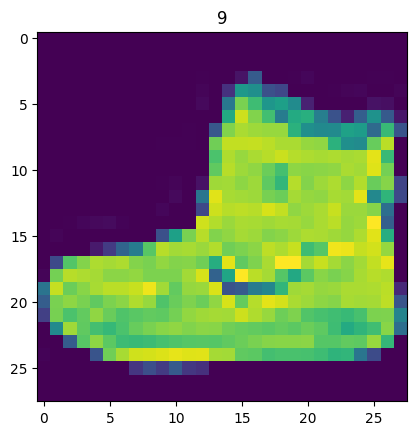

In [18]:
image , label = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

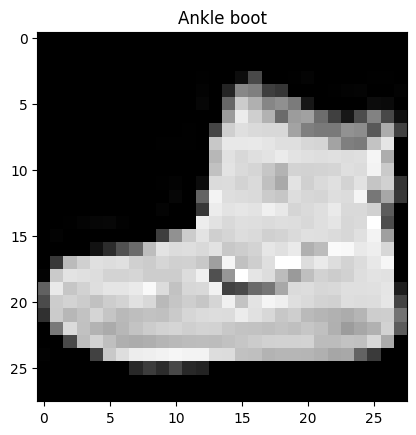

In [19]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])

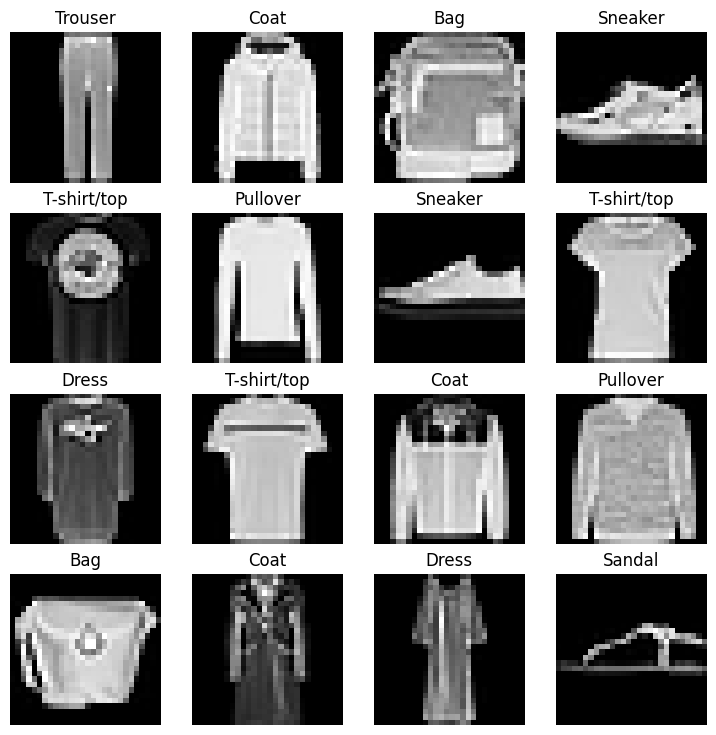

In [20]:
# Plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows , cols = 4 , 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image , label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

## Prepare DataLoader

In [21]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [22]:
# Let's check out what we've created
print(f"Dataloader: {train_dataloader , test_dataloader}")
print(f"Lenght/ No. of batches of/in Trian_dataloader: {len(train_dataloader)} of batch size {BATCH_SIZE}")
print(f"Lenght/ No. of batches of/in Test_dataloader: {len(test_dataloader)} of batch size {BATCH_SIZE}")

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7ed5a96b8520>, <torch.utils.data.dataloader.DataLoader object at 0x7ed5a96bb190>)
Lenght/ No. of batches of/in Trian_dataloader: 1875 of batch size 32
Lenght/ No. of batches of/in Test_dataloader: 313 of batch size 32


In [23]:
# Check out whar's inside the training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 5 , labe1 size: torch.Size([])


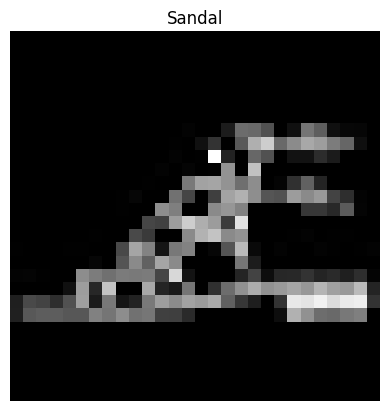

In [24]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {image.shape}")
print(f"Label: {label} , labe1 size: {label.shape}")

In [25]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## Build a base line model

In [26]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_Stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_Stack(x)

In [27]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=8, # how many units in the hidden layer
    output_shape=len(class_names) # one for ech class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_Stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [28]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [29]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n-----------")
  ### Training
  train_loss , train_acc = 0 , 0
  # Add a loop to loop through training batches
  for batch , (X,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss

    acc = accuracy_fn(y_true=y,
                      y_pred=y_pred.argmax(dim=1))
    train_acc += acc

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Print what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train_dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  ### Testing
  test_loss , test_acc = 0 , 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test,
                      y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\n Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.9280 | Train acc: 68.8667 | Test loss: 0.6809 | test acc: 75.4393
Epoch: 1 
-----------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.5986 | Train acc: 79.3033 | Test loss: 0.5764 | test acc: 79.5927
Epoch: 2 
-----------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.5299 | Train acc: 81.7617 | Test loss: 0.5350 | test acc: 81.3299


In [30]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = None):
  loss, acc = 0 , 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X , y = X.to(device) , y.to(device)

      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name :": model.__class__.__name__,
          "model_loss :": loss.item(),
          "model_acc :": acc}

In [31]:
# Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device = "cpu")
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name :': 'FashionMNISTModelV0',
 'model_loss :': 0.5350313782691956,
 'model_acc :': 81.32987220447285}

In [98]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     decice: torch.device = "cpu"):
  pred_probs = []
  model
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (ass a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0)

      # Forward pass (model output raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      #pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred prob off the gpu for further calculation
      pred_probs.append(pred_logit.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [111]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample , label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

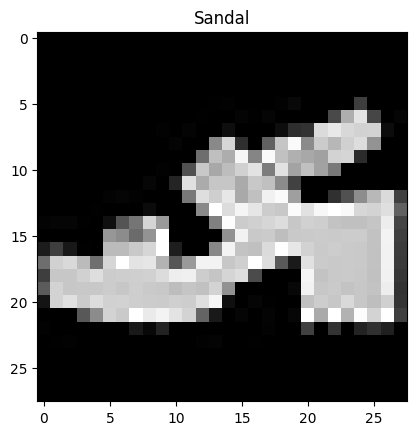

In [112]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [113]:
# Make predictions
pred_probs = make_predictions(model=model_0,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[[-4.0750, -9.4089, -5.5162, -5.4128, -4.8110,  9.3279, -2.8934,
           6.1750,  3.1032,  8.0615]],

        [[ 3.6239,  3.5381,  2.1237,  5.8889,  3.6315, -8.0782,  3.3054,
          -5.1376, -0.2515, -5.2086]]])

In [114]:
# Convert prediction to probabilities to labels
pred_classes = pred_probs.argmax(dim=0)
pred_classes = pred_classes.squeeze()
pred_classes

tensor([5, 8, 3, 4, 6, 0, 6, 2, 2, 2])

In [115]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

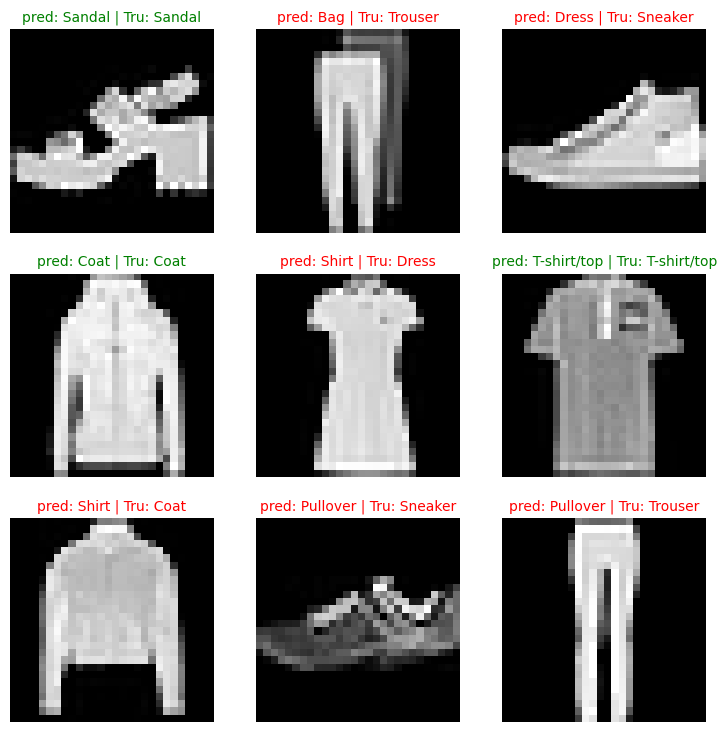

In [116]:
#plot pedictions
plt.figure(figsize=(9,9))
nrows , ncols = 3 , 3
for i , sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction (in texxt form , e.g 'sandal')
  pred_label = class_names[pred_classes[i]]

  # Get true label in text form
  true_label = class_names[test_labels[i]]

  # Create a rirle for the plot
  title_text = f"pred: {pred_label} | Tru: {true_label}"

  # Check for equality of pred and true labels and change color of title text
  if pred_label == true_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False);

In [39]:
# Import tqdm.auto
from tqdm.auto import tqdm

y_preds = []
model_0.eval()
with torch.inference_mode():
  for X , y in tqdm(test_dataloader, desc='Making predictions.........'):
    y_logits = model_0(X)
    #y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_logits.cpu())

#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions.........:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([[ -4.0038,  -8.3343,  -4.0713,  -3.5315,  -5.0251,   5.6679,  -3.4518,
           6.4154,   2.5491,   6.8773],
        [  4.0192,  -1.5460,  11.6722,   1.4855,   6.6263,  -9.8052,   9.5236,
         -13.1430,   2.7760,  -8.1975],
        [  1.9774,  15.0852,   3.3895,   5.0164,   7.6133,  -9.5075,  -1.3347,
          -7.3661,  -2.7477,  -9.0140],
        [  0.5745,  13.1880,   2.4335,   5.2875,   5.1681,  -7.8819,  -1.7230,
          -5.4691,  -2.7684,  -6.5024],
        [  3.6819,  -1.5311,   3.6114,   1.6141,   1.6912,  -4.3089,   5.2957,
          -5.7729,   0.6082,  -2.5798],
        [  3.4939,  11.6371,   3.8059,   4.1630,   7.4780,  -8.9759,   1.2487,
          -7.8928,  -2.3491,  -8.7353],
        [  2.3919,   1.7023,   2.5799,  -1.4171,   5.8392,  -0.1751,   4.2902,
          -6.0900,   0.9456,  -5.6547],
        [  1.5249,   0.5248,   3.8488,   1.0233,   4.9630,  -1.4008,   6.0729,
          -6.9131,   1.2396,  -5.2763],
        [ -1.5245,  -1.1828,  -0.8837,  -0.2642,

In [41]:
! pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 4.0 MB/s eta 0:00:00


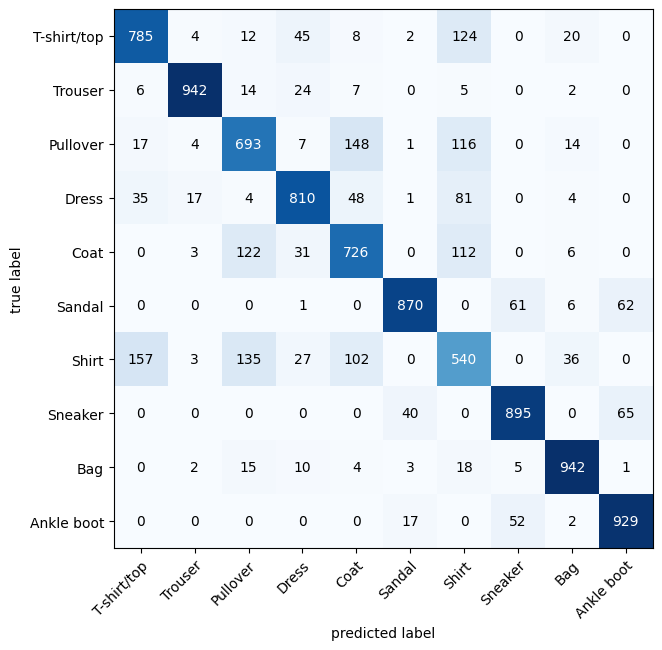

In [42]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

# Assignment 2

## CNN Model Construction

In [43]:
device = "cpu"

In [44]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  """Perform training with model trying to learn on data_loader"""

  ### Training
  model.train()

  train_loss , train_acc = 0 , 0

  # Add a loop to loop through training batches
  for batch , (X,y) in enumerate(data_loader):
    X , y = X.to(device) , y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss

    acc = accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))
    train_acc += acc

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Print what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss and acc by length of train_dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"\n Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}")


In [45]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  """Perform testing with model trying to learn on data_loader"""

  ### testing
  model.eval()

  test_loss , test_acc = 0 , 0

  with torch.inference_mode():
    for X_test,y_test in data_loader:
      X_test , y_test = X_test.to(device) , y_test.to(device)

      test_pred = model(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test,
                      y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\n Test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")

In [46]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # input to this layer depends on the ouput of flatten layer which is 490 in this case
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x

In [47]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [48]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.005)


In [49]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 1.3354 | Train acc: 51.6267

 Test loss: 0.7062 | test acc: 74.1713
Epoch: 1
------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.6621 | Train acc: 76.0083

 Test loss: 0.6429 | test acc: 75.3794
Epoch: 2
------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.5683 | Train acc: 79.3867

 Test loss: 0.5480 | test acc: 80.1418


In [50]:
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name :': 'FashionMNISTModelV2',
 'model_loss :': 0.5479503870010376,
 'model_acc :': 80.1417731629393}

In [51]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     decice: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (ass a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model output raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred prob off the gpu for further calculation
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [52]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample , label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Bag')

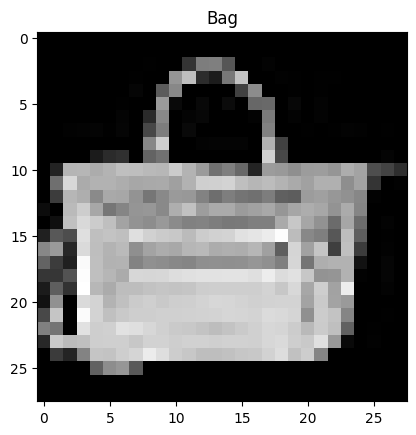

In [53]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [54]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[3.1701e-05, 1.0051e-06, 8.8089e-04, 1.5565e-05, 2.2217e-03, 5.7034e-06,
         3.2310e-04, 4.9164e-06, 9.9651e-01, 2.4904e-06],
        [3.0720e-03, 9.2227e-01, 1.3108e-04, 7.0007e-02, 4.1978e-03, 6.2119e-07,
         2.1626e-04, 3.4060e-05, 4.2660e-05, 2.6949e-05]])

In [55]:
# Convert prediction to probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 1, 4, 7, 2, 6, 6, 6, 6])

In [56]:
test_labels

[8, 1, 4, 7, 2, 6, 6, 6, 2]

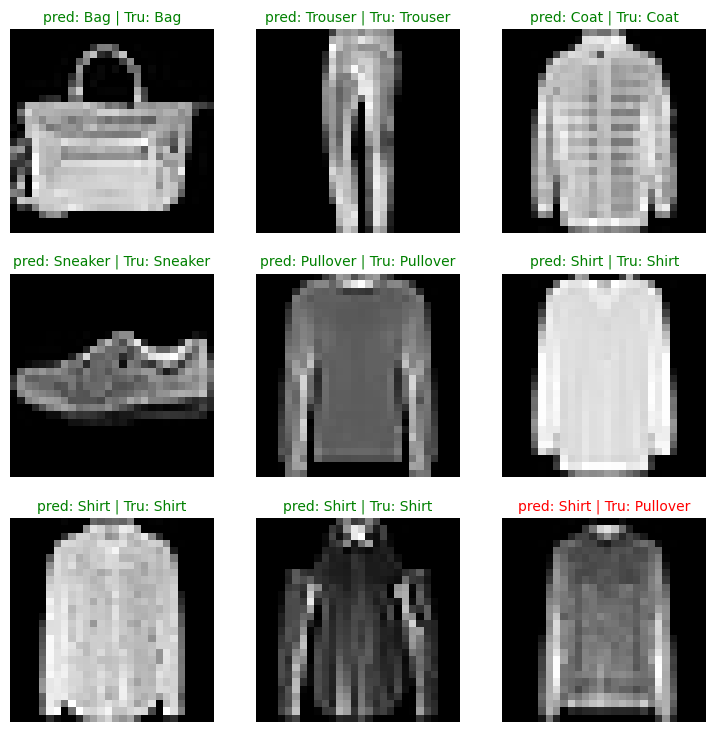

In [57]:
#plot pedictions
plt.figure(figsize=(9,9))
nrows , ncols = 3 , 3
for i , sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction (in texxt form , e.g 'sandal')
  pred_label = class_names[pred_classes[i]]

  # Get true label in text form
  true_label = class_names[test_labels[i]]

  # Create a rirle for the plot
  title_text = f"pred: {pred_label} | Tru: {true_label}"

  # Check for equality of pred and true labels and change color of title text
  if pred_label == true_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False);

In [58]:
# Import tqdm.auto
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X , y in tqdm(test_dataloader, desc='Making predictions.........'):
    X , y = X.to(device) , y.to(device)
    y_logits = model_2(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions.........:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

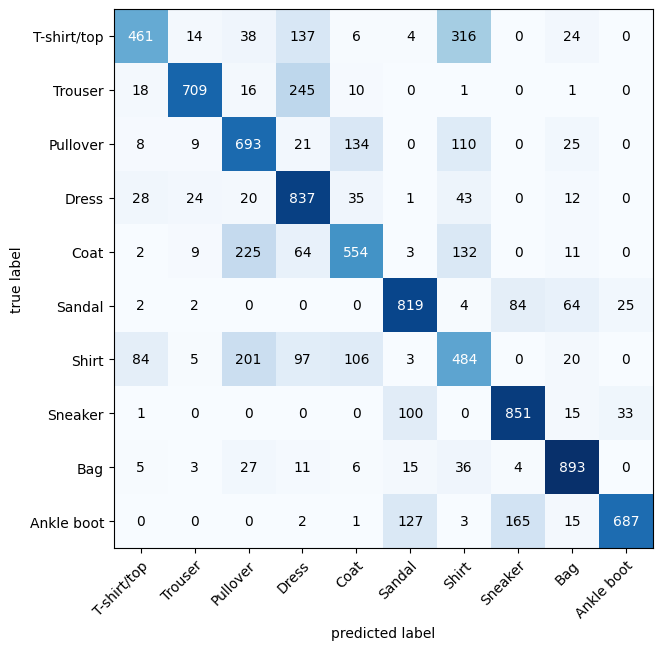

In [59]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## CNN Performance on Augmented Data

In [60]:
# Setup training data and testing

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
])

from torchvision import datasets
train_data_aug = datasets.FashionMNIST(
    root='data', # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download?
    transform=transform, # how do we want to transform the dta?
    target_transform=None # how do we wnat to transform the labels/targets?
)

test_data_aug = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=transform,
    target_transform=None
)

In [61]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader_aug = DataLoader(dataset=train_data_aug,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader_aug = DataLoader(dataset=test_data_aug,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [62]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(model=model_2,
             data_loader=train_dataloader_aug,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader_aug,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.8458 | Train acc: 70.0583

 Test loss: 0.7028 | test acc: 75.1597
Epoch: 1
------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.6731 | Train acc: 76.0750

 Test loss: 0.6547 | test acc: 76.5276
Epoch: 2
------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.6188 | Train acc: 77.7467

 Test loss: 0.6139 | test acc: 78.3746


In [63]:
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name :': 'FashionMNISTModelV2',
 'model_loss :': 0.5620023012161255,
 'model_acc :': 79.99201277955271}

In [64]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     decice: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (ass a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model output raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred prob off the gpu for further calculation
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [65]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample , label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

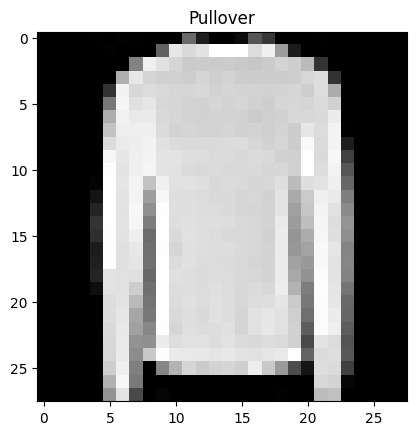

In [66]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [67]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[7.5449e-03, 2.3584e-04, 5.5292e-01, 7.3222e-02, 1.3067e-01, 7.8845e-07,
         2.3483e-01, 8.2106e-10, 5.7381e-04, 8.2145e-07],
        [3.6829e-07, 1.0239e-06, 5.7079e-06, 4.5882e-06, 1.3225e-06, 1.4787e-02,
         1.0910e-06, 9.8273e-01, 1.1963e-04, 2.3465e-03]])

In [68]:
# Convert prediction to probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 7, 6, 9, 9, 4, 9, 6, 9])

In [69]:
test_labels

[2, 7, 4, 9, 9, 4, 9, 6, 9]

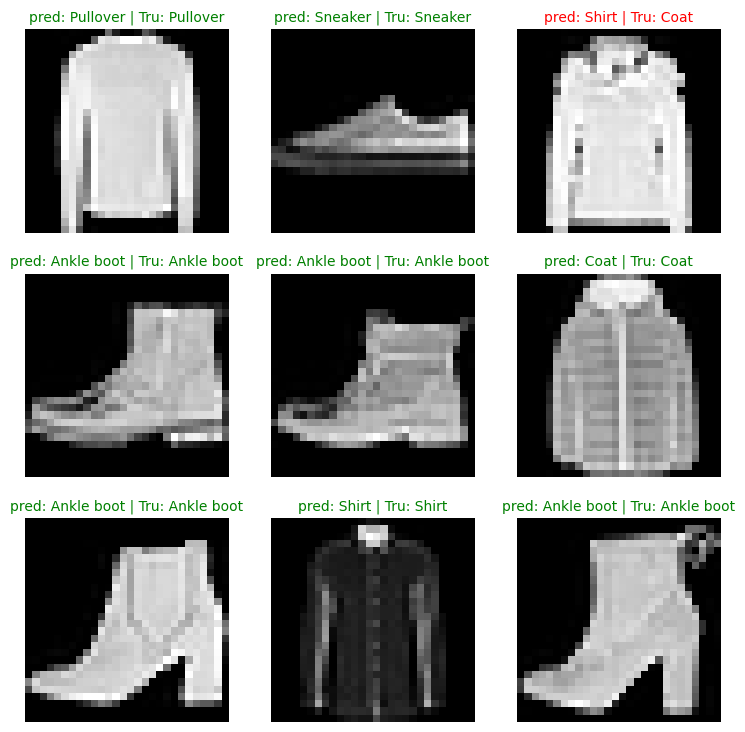

In [70]:
#plot pedictions
plt.figure(figsize=(9,9))
nrows , ncols = 3 , 3
for i , sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction (in texxt form , e.g 'sandal')
  pred_label = class_names[pred_classes[i]]

  # Get true label in text form
  true_label = class_names[test_labels[i]]

  # Create a rirle for the plot
  title_text = f"pred: {pred_label} | Tru: {true_label}"

  # Check for equality of pred and true labels and change color of title text
  if pred_label == true_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False);

In [71]:
# Import tqdm.auto
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X , y in tqdm(test_dataloader, desc='Making predictions.........'):
    X , y = X.to(device) , y.to(device)
    y_logits = model_2(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions.........:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 3, 6, 1, 4, 6, 5, 7])

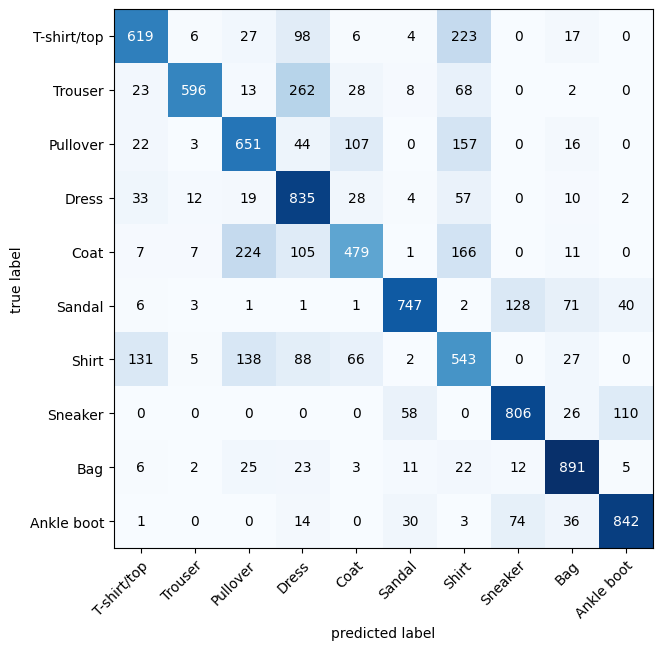

In [72]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## Transfer learning

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset

# Define a custom classifier using a pre-trained ResNet with 1 input channel
class CustomClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CustomClassifier, self).__init__()

        # Load a pre-trained ResNet model
        self.resnet = models.resnet18(pretrained=True)

        # Modify the first convolutional layer for 1 input channel
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Modify the final classification layer
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        x = self.resnet(x)
        return x

# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.ToTensor(),
])

# Load the data
full_train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)

full_test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
)

# Define the indices to include in the subsets (for example, the first 1000 samples)
train_subset_indices = list(range(1000))
test_subset_indices = list(range(500))  # Creating a smaller test subset

# Create subsets of the training and test datasets
train_subset = Subset(full_train_data, train_subset_indices)
test_subset = Subset(full_test_data, test_subset_indices)

# Define batch size
BATCH_SIZE = 32

# Create data loaders for the subsets
train_dataloader = DataLoader(dataset=train_subset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_subset, batch_size=BATCH_SIZE, shuffle=False)


# Create the custom model with a pre-trained ResNet backbone
num_classes = 10  # For Fashion MNIST
model = CustomClassifier(num_classes=num_classes)

# Freeze all layers except the final classification layer
for param in model.resnet.parameters():
    param.requires_grad = True

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.resnet.fc.parameters(), lr=0.001)

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 10
torch.manual_seed(42)

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(model=model,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 61.0MB/s]


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
------------
Looked at 0/1000 samples.

 Train loss: 1.9230 | Train acc: 34.4727

 Test loss: 2.2466 | test acc: 14.1016
Epoch: 1
------------
Looked at 0/1000 samples.

 Train loss: 1.2515 | Train acc: 66.1133

 Test loss: 1.4962 | test acc: 53.9844
Epoch: 2
------------
Looked at 0/1000 samples.

 Train loss: 0.9712 | Train acc: 75.0000

 Test loss: 0.9321 | test acc: 73.3594
Epoch: 3
------------
Looked at 0/1000 samples.

 Train loss: 0.8341 | Train acc: 77.9297

 Test loss: 0.7965 | test acc: 78.5156
Epoch: 4
------------
Looked at 0/1000 samples.

 Train loss: 0.7347 | Train acc: 81.5430

 Test loss: 0.7735 | test acc: 76.6797
Epoch: 5
------------
Looked at 0/1000 samples.

 Train loss: 0.7009 | Train acc: 80.0781

 Test loss: 0.7365 | test acc: 76.0938
Epoch: 6
------------
Looked at 0/1000 samples.

 Train loss: 0.6487 | Train acc: 81.9336

 Test loss: 0.6786 | test acc: 79.8047
Epoch: 7
------------
Looked at 0/1000 samples.

 Train loss: 0.5877 | Train acc: 84.5703


# Assignment 3

In [85]:
import numpy as np
import mnist
from tensorflow import keras

In [86]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

(12665, 28, 28)
(2115, 28, 28)


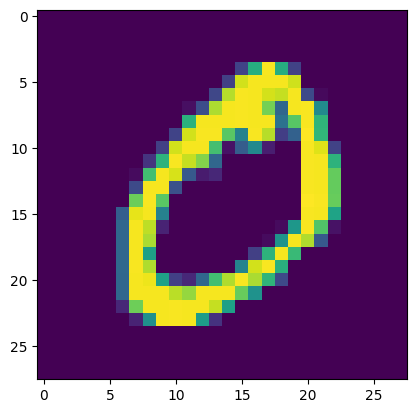

In [87]:
train_mask = (train_labels == 0) | (train_labels == 1)
test_mask = (test_labels == 0) | (test_labels == 1)

train_images_filtered = train_images[train_mask]
train_labels_filtered = train_labels[train_mask]

test_images_filtered = test_images[test_mask]
test_labels_filtered = test_labels[test_mask]
plt.imshow(train_images_filtered[0])
print(np.shape(train_images_filtered))
print(np.shape(test_images_filtered))

In [88]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model as a function for use with scikit-learn
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Hyperparameter grid for grid search
param_grid = {
    'epochs': [3, 5, 7],
    'batch_size': [32, 64, 128]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(train_images_filtered[0:int(len(train_images_filtered)/20)], train_labels_filtered[0:int(len(train_images_filtered)/20)])

# Print the best parameters
print("Best parameters:", grid_search.best_params_)


<ipython-input-88-e87832ad9c90>:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Epoch 1/3
14/14 [==============================] - 4s 60ms/step - loss: 0.1277 - accuracy: 0.9787
Epoch 2/3
14/14 [==============================] - 1s 64ms/step - loss: 1.7627 - accuracy: 0.9360
Epoch 3/3
7/7 [==============================] - 1s 25ms/step - loss: 0.0850 - accuracy: 0.9953
Epoch 1/3
14/14 [==============================] - 51s 32ms/step - loss: 0.5535 - accuracy: 0.9431
Epoch 2/3
14/14 [==============================] - 0s 32ms/step - loss: 0.0812 - accuracy: 0.9976
Epoch 3/3
7/7 [==============================] - 0s 12ms/step - loss: 0.0772 - accuracy: 0.9953
Epoch 1/3
14/14 [==============================] - 2s 32ms/step - loss: 1.4030 - accuracy: 0.9360
Epoch 2/3
14/14 [==============================] - 0s 31ms/step - loss: 0.0332 - accuracy: 0.9929
Epoch 3/3
7/7 [==============================] - 0s 11ms/step - loss: 7.9096e-09 - accuracy: 1.0000
Epoch 1/5
14/14 [==============================] - 2s 32ms/step - loss: 1.4087 - accuracy: 0.9028
Epoch 2/5
14/14 [====

2/2 [==============================] - 0s 27ms/step - loss: 1.0203e-05 - accuracy: 1.0000
Epoch 1/5
4/4 [==============================] - 3s 90ms/step - loss: 8.9742 - accuracy: 0.6564
Epoch 2/5
4/4 [==============================] - 0s 87ms/step - loss: 0.1501 - accuracy: 0.9929
Epoch 3/5
4/4 [==============================] - 0s 88ms/step - loss: 0.1309 - accuracy: 0.9858
Epoch 4/5
4/4 [==============================] - 0s 93ms/step - loss: 0.0051 - accuracy: 0.9976
Epoch 5/5
4/4 [==============================] - 0s 84ms/step - loss: 0.0337 - accuracy: 0.9976


2/2 [==============================] - 0s 28ms/step - loss: 0.0708 - accuracy: 0.9905
Epoch 1/5
4/4 [==============================] - 2s 157ms/step - loss: 2.2960 - accuracy: 0.7536
Epoch 2/5
4/4 [==============================] - 1s 141ms/step - loss: 0.3930 - accuracy: 0.9834
Epoch 3/5
4/4 [==============================] - 1s 151ms/step - loss: 0.1856 - accuracy: 0.9929
Epoch 4/5
4/4 [==============================] - 0s 101ms/step - loss: 0.0454 - accuracy: 0.9953
Epoch 5/5
2/2 [==============================] - 0s 27ms/step - loss: 0.3160 - accuracy: 0.9953
Epoch 1/5
4/4 [==============================] - 2s 82ms/step - loss: 10.3792 - accuracy: 0.5948
Epoch 2/5
4/4 [==============================] - 0s 88ms/step - loss: 0.6423 - accuracy: 0.9787
Epoch 3/5
4/4 [==============================] - 0s 85ms/step - loss: 0.3151 - accuracy: 0.9858
Epoch 4/5
4/4 [==============================] - 0s 84ms/step - loss: 0.3123 - accuracy: 0.9810
Epoch 5/5
2/2 [==============================

# Assignment 4

In [1]:
import tensorflow as tf
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocessing parameters
image_size = (32, 32)  # Desired image size
num_classes = 10  # Number of classes in CIFAR-10

# Resize the images to the desired size
x_train_resized = tf.image.resize(x_train, size=image_size)
x_test_resized = tf.image.resize(x_test, size=image_size)

# Normalize pixel values to the range [0, 1]
x_train_normalized = x_train_resized / 255.0
x_test_normalized = x_test_resized / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

# Split the dataset into training and validation sets (e.g., 80% training, 20% validation)
validation_split = 0.2
num_samples = len(x_train_normalized)
split_index = int((1 - validation_split) * num_samples)

x_train_split = x_train_normalized[:split_index]
y_train_split = y_train_one_hot[:split_index]

x_val_split = x_train_normalized[split_index:]
y_val_split = y_train_one_hot[split_index:]

# Print the shapes of the preprocessed datasets
print("Shape of x_train_split:", x_train_split.shape)
print("Shape of y_train_split:", y_train_split.shape)
print("Shape of x_val_split:", x_val_split.shape)
print("Shape of y_val_split:", y_val_split.shape)
print("Shape of x_test_normalized:", x_test_normalized.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)


170498071/170498071 [==============================] - 2s 0us/step
Shape of x_train_split: (40000, 32, 32, 3)
Shape of y_train_split: (40000, 10)
Shape of x_val_split: (10000, 32, 32, 3)
Shape of y_val_split: (10000, 10)
Shape of x_test_normalized: (10000, 32, 32, 3)
Shape of y_test_one_hot: (10000, 10)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the pre-trained model you want to use
model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze certain layers of the pre-trained model
for layer in model.layers[:100]:  # Example: Freeze the first 100 layers
    layer.trainable = False

# Add custom layers for classification
x = layers.GlobalAveragePooling2D()(model.output)
x = layers.Dense(256, activation='relu')(x)
output = layers.Dense(10, activation='softmax')(x)  # 10 classes for CIFAR-10

# Create the fine-tuned model
model = Model(inputs=model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 8
batch_size = 128

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/8
313/313 [==============================] - 354s 1s/step - loss: 1.8998 - accuracy: 0.3017 - val_loss: 2.4115 - val_accuracy: 0.2033
Epoch 2/8
313/313 [==============================] - 328s 1s/step - loss: 1.6580 - accuracy: 0.3890 - val_loss: 2.3415 - val_accuracy: 0.1768
Epoch 3/8
313/313 [==============================] - 328s 1s/step - loss: 1.5652 - accuracy: 0.4204 - val_loss: 2.9740 - val_accuracy: 0.1213
Epoch 4/8
313/313 [==============================] - 328s 1s/step - loss: 1.5097 - accuracy: 0.4451 - val_loss: 2.3999 - val_accuracy: 0.1826
Epoch 5/8
313/313 [==============================] - 328s 1s/step - loss: 1.4695 - accuracy: 0.4575 - val_loss: 2.8043 - val_accuracy: 0.1856
Epoch 6/8
313/313 [==============================] - 322s 1s/step - loss: 1.4365 - accuracy: 0.4708 - val_loss: 3.3368 - val_accuracy: 0.1684
Epoch 7/8
313/313 [==============================] - 325s 1s/step - loss: 1.4027 - accuracy: 0.4843 - val_loss: 6.5253 - val_accuracy: 0.1493
Epoch 

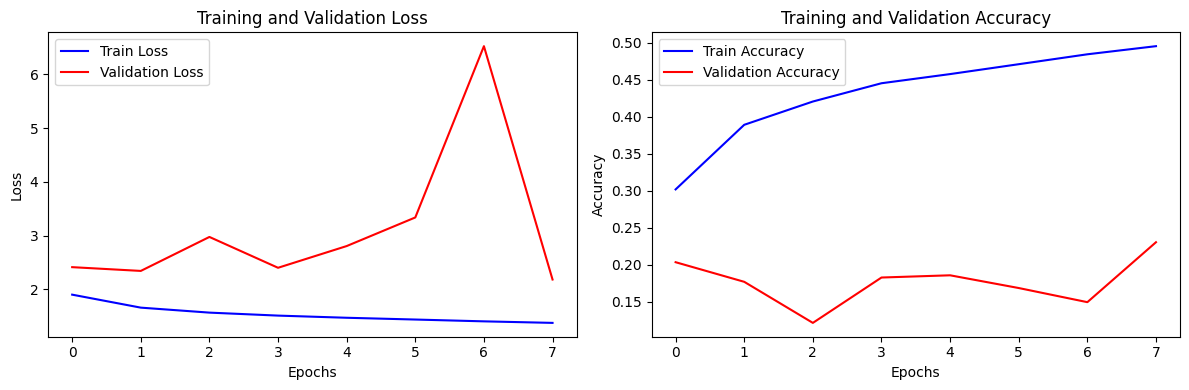

In [8]:
import matplotlib.pyplot as plt

# Training history from model.fit
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training loss and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


# Assignment 5

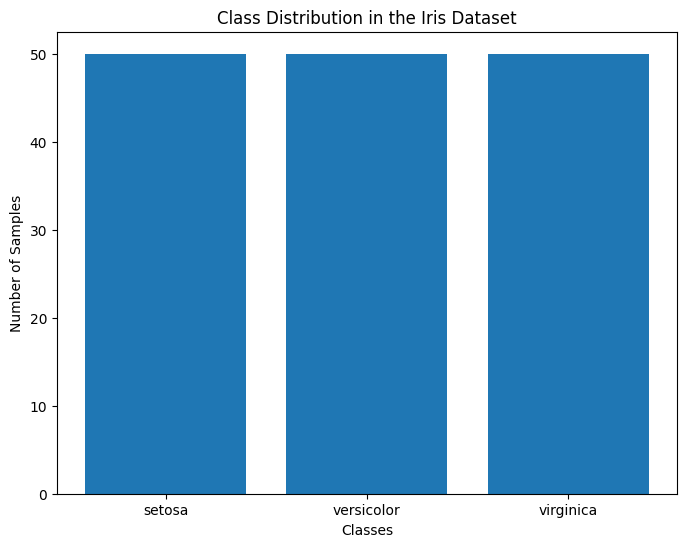

Imbalance Ratio: 1.00


In [9]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Check the class distribution
class_counts = data['target'].value_counts()
class_names = iris.target_names

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts)
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Iris Dataset')
plt.show()

# Calculate the severity of imbalance
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


In [10]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Create a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (recommended for many classifiers)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a classifier (Random Forest in this example)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
y_pred = clf.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86        31
           1       1.00      0.97      0.98       269

    accuracy                           0.97       300
   macro avg       0.88      0.97      0.92       300
weighted avg       0.97      0.97      0.97       300



Precision: 1.00
Recall: 0.97
F1-score: 0.98
AUC: 0.99


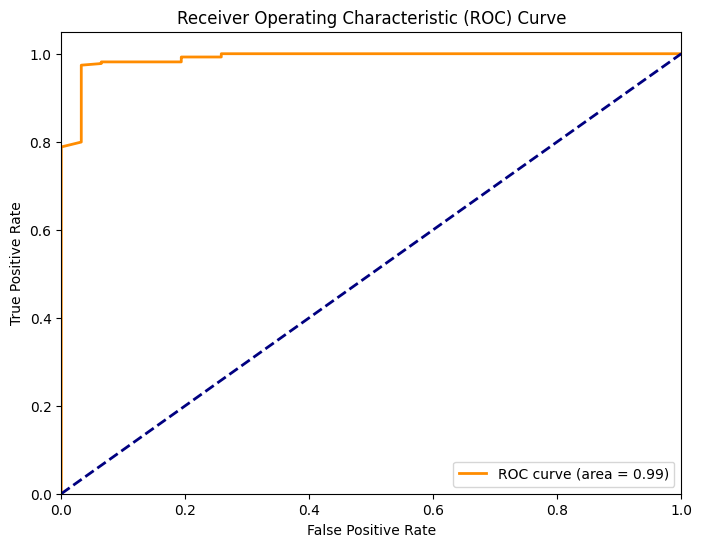

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("AUC: {:.2f}".format(roc_auc))

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
